<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A" data-toc-modified-id="A-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A</a></span><ul class="toc-item"><li><span><a href="#plain_mc" data-toc-modified-id="plain_mc-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>plain_mc</a></span></li><li><span><a href="#Approximate-the-integral-using-a-quadrature-based-method-(you-may-use-a-third-party-library):" data-toc-modified-id="Approximate-the-integral-using-a-quadrature-based-method-(you-may-use-a-third-party-library):-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Approximate the integral using a quadrature based method (you may use a third-party library):</a></span></li><li><span><a href="#Approximate-the-integral-using-Monte-Carlo-(100-samples):" data-toc-modified-id="Approximate-the-integral-using-Monte-Carlo-(100-samples):-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Approximate the integral using Monte Carlo (100 samples):</a></span></li><li><span><a href="#Monte-carlo-1000-trials---CI-interval-calculation" data-toc-modified-id="Monte-carlo-1000-trials---CI-interval-calculation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Monte carlo 1000 trials - CI interval calculation</a></span></li><li><span><a href="#Importance-sampling" data-toc-modified-id="Importance-sampling-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Importance sampling</a></span></li><li><span><a href="#Rejection-sampling" data-toc-modified-id="Rejection-sampling-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Rejection sampling</a></span></li><li><span><a href="#Metropolis---Hastings" data-toc-modified-id="Metropolis---Hastings-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Metropolis - Hastings</a></span></li></ul></li><li><span><a href="#B" data-toc-modified-id="B-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>B</a></span><ul class="toc-item"><li><span><a href="#Note:" data-toc-modified-id="Note:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Note:</a></span></li><li><span><a href="#$K_1$" data-toc-modified-id="$K_1$-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>$K_1$</a></span></li><li><span><a href="#$K_2$" data-toc-modified-id="$K_2$-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>$K_2$</a></span></li><li><span><a href="#$K_3$" data-toc-modified-id="$K_3$-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>$K_3$</a></span></li><li><span><a href="#$K_4$" data-toc-modified-id="$K_4$-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>$K_4$</a></span></li><li><span><a href="#$K_5$" data-toc-modified-id="$K_5$-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>$K_5$</a></span></li></ul></li><li><span><a href="#C" data-toc-modified-id="C-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>C</a></span><ul class="toc-item"><li><span><a href="#Comment:" data-toc-modified-id="Comment:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Comment:</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.integrate as integrate
import pymc3 as pm
import multiprocessing
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


# A

## plain_mc

In [2]:
def plain_monte_carlo(f,dist,n=100):
    data = []
    X = dist.rvs(n)
    res = f(X)/dist.pdf(X)
    res = np.array(res)
    avg = [np.mean(res[:i]) for i in range(1,res.size)]
    return np.array(res),np.array(avg),np.array(X)

In [3]:
def f_x(x):
    return 10*np.exp(-5*(x-3)**4)

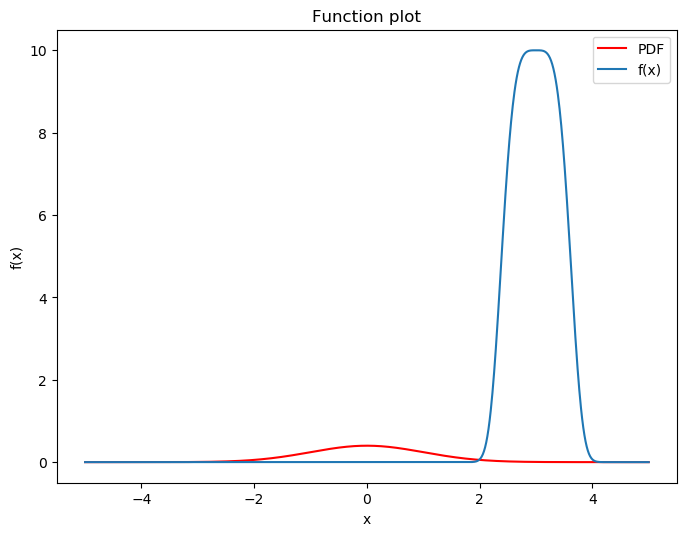

In [4]:
X = np.linspace(-5,5,1000)
mean= 0
std = 1
y = scipy.stats.norm.pdf(X,mean,std)
# scipy.sta
plt.plot(X,y, color='red',label='PDF')
plt.plot(X,f_x(X),label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Function plot')
plt.show()

## Approximate the integral using a quadrature based method (you may use a third-party library):

In [5]:
int_val,abs_err = integrate.quad(f_x,-np.inf,np.inf)
print("Integral value is:", int_val)
print("Estimated abs error:", abs_err)

Integral value is: 12.122957378751272
Estimated abs error: 1.0987079435453134e-07


## Approximate the integral using Monte Carlo (100 samples):

In [61]:
N=10**2
expected_v,avg_v,x_arr = plain_monte_carlo(f_x,scipy.stats.norm(mean,std) ,n = N)

In [62]:
print('Approx:',np.mean(expected_v))
print('Variance:',np.sqrt(np.var(expected_v)/N))

Approx: 25.826681071935663
Variance: 22.26275987111506


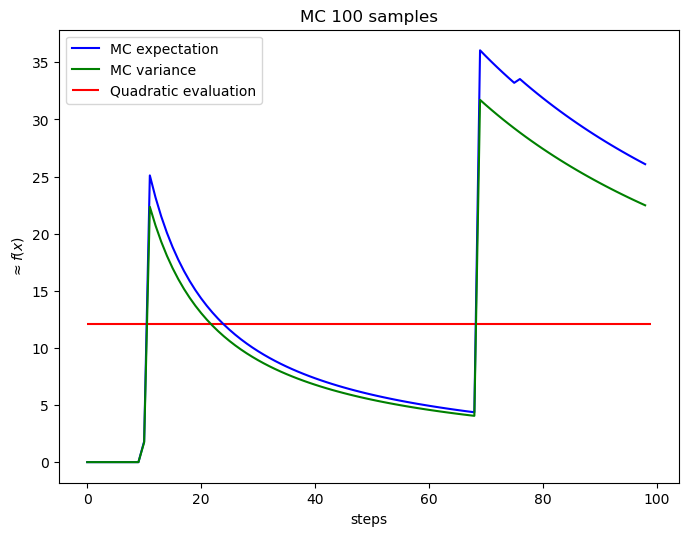

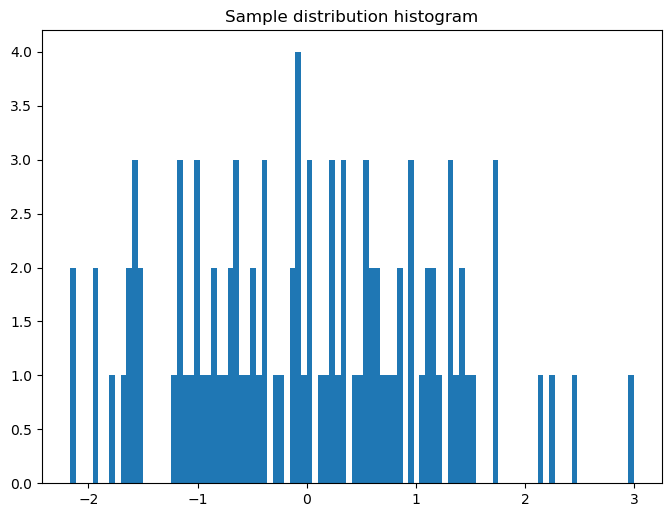

In [63]:
plt.plot(np.arange(0,len(avg_v)),avg_v,label='MC expectation',color="blue")
plt.plot([np.sqrt(np.var(expected_v[:i])/i) for i in range(1,len(expected_v))],label='MC variance',color="green")
plt.hlines(int_val,0,len(avg_v),label ="Quadratic evaluation",color="red")
plt.legend()
plt.xlabel('steps')
plt.ylabel(r'$\approx f(x)$')
plt.title('MC 100 samples')
plt.show()

plt.hist(x_arr,bins=100)
plt.title('Sample distribution histogram')
plt.show()

In [64]:
def ci_calc(X_arr,true_v =1,sd=1,n=1000):
    conf_int = scipy.stats.norm.interval(0.9, loc=np.mean(X_arr), scale=X_arr.std(ddof=1))
    return ((X_arr >= conf_int[0]) & (X_arr < conf_int[1])).sum() / float(n)

In [65]:
def mc_iter(_iter=1000):
    exp_res = []
    avg_res = []
    ci_res = []
    for _ in range(_iter):
        expected_v,avg_v,X_arr = plain_monte_carlo(f_x,scipy.stats.norm(mean,std),n = N)
        exp_res.append(np.mean(expected_v))
        avg_res.append(avg_v)
        ci_res.append(ci_calc(X_arr))
    return np.array(exp_res),np.array(avg_res),np.array(ci_res)

## Monte carlo 1000 trials - CI interval calculation

In [66]:
M = 10**3
exp,avg,ci_res = mc_iter(M)

In [67]:
print('Approx (1000 iterations):',np.mean(exp))

Approx (1000 iterations): 12.634860743829535


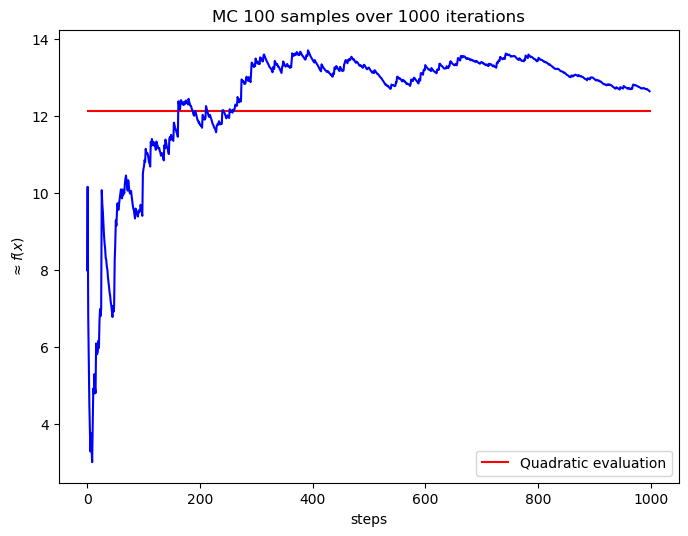

In [68]:
plt.plot([np.mean(exp[:i]) for i in range(1,exp.size)],color="blue")
plt.hlines(int_val,0,M,label ="Quadratic evaluation",color="red")

plt.legend()
plt.xlabel('steps')
plt.ylabel(r'$\approx f(x)$')
plt.title('MC 100 samples over 1000 iterations')
plt.show()

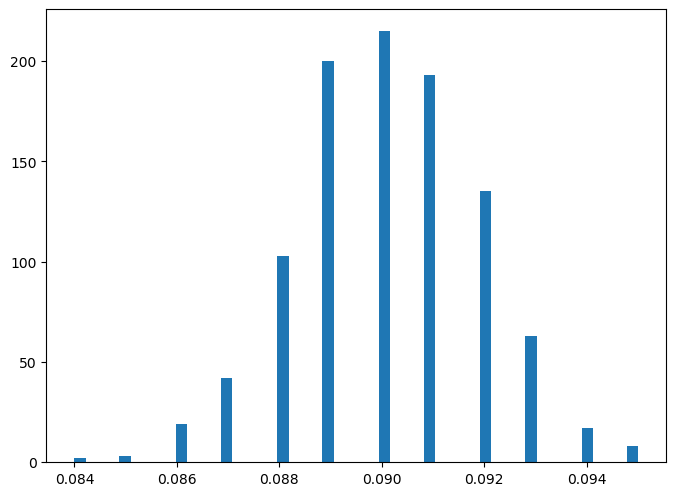

Percentage of time for CI: 63.1 %


In [69]:
plt.hist(ci_res,bins=50)
plt.show()
ci_size = np.count_nonzero(np.array(ci_res)>=0.09)/len(ci_res)
print('Percentage of time for CI:',ci_size*100,r'%')

## Importance sampling

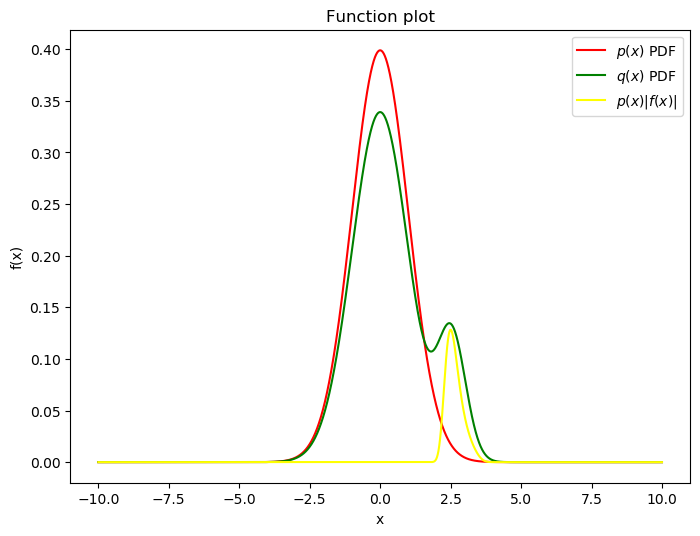

In [15]:
X = np.linspace(-10,10,10000)
m_p= 0
sd_p = 1
m_q= 3
sd_q = 2
y = scipy.stats.norm.pdf(X,m_p,sd_p)
shape = y*np.abs(f_x(X))
plt.plot(X,y, color='red',label=r'$p(x)$ PDF')
y = 1*(0.15*scipy.stats.norm.pdf(X,2.54,0.5) + 0.85*scipy.stats.norm.pdf(X,0,1))
plt.plot(X,y, color='green',label=r'$q(x)$ PDF')
plt.plot(X,shape, color='yellow',label=r'$p(x)|f(x)|$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Function plot')
plt.show()

In [16]:
def importance_sampling_mc(f,n=100):
    def q_x():
        c  = np.random.choice(np.array([0,1]),p=[0.15,0.85])
        if c>0:
            return scipy.stats.norm(0,1)
        else: 
            return scipy.stats.norm(2.54,0.5)
    def q_pdf(x):
        return 0.15*scipy.stats.norm.pdf(x,2.5,0.5) + 0.85*scipy.stats.norm.pdf(x,0,1)
    p_x  = scipy.stats.norm(0,1)
    avg = []
    X = np.array([q_x().rvs() for _ in range(n)])
    w = p_x.pdf(X)/q_pdf(X)
    res = (f(X)*p_x.pdf(X)/q_pdf(X))
    avg = [np.mean(res[:i]) for i in range(1,n)]
    return res,avg,X

In [17]:
data =[]
for i in range(M):
    
    exp,avg,x_arr = importance_sampling_mc(f_x,10**2)
    data.append(np.mean(exp))


In [18]:
print('Approx (1000 iterations):',np.mean(data))

Approx (1000 iterations): 0.09172636694889155


In [19]:
exp,avg,x_arr = importance_sampling_mc(f_x,10**2)
print('Approx:',np.mean(exp))
print('Variance:',np.sqrt(np.var(exp)/N))

Approx: 0.0945826769641749
Variance: 0.025825007310975444


## Rejection sampling

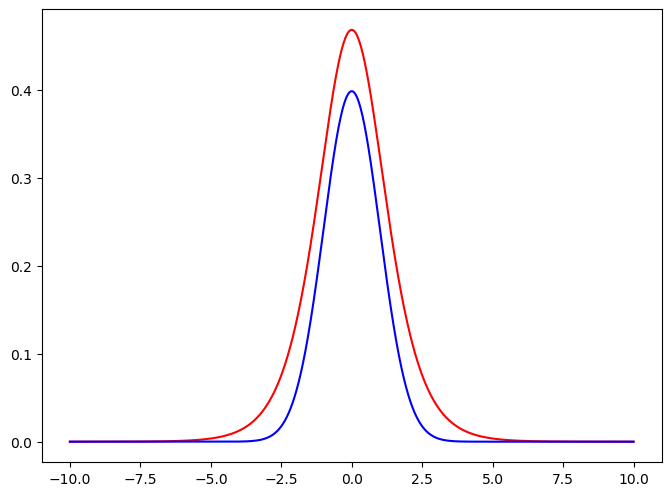

In [20]:
plt.plot(X,1.5*scipy.stats.logistic(0,0.8).pdf(X),color="red")
plt.plot(X,scipy.stats.norm(0,1).pdf(X),color="blue")
plt.show()

In [21]:
def rej_sam_mc(f,p,g,n=100):
    def get_sample():
        x = g.rvs()
        xp = p.pdf(x)
        xg = 1.5*g.pdf(x)
        vert = scipy.stats.uniform(0,xg).rvs()
        if(vert <=xp):
            return x
        else:
            return get_sample()
    X = np.array([get_sample() for _ in range(n)])
    res = f(X)/p.pdf(X)
    avg = [np.mean(res[:i]) for i in range(1,res.size)]
    return np.array(res),np.array(avg),np.array(X)

In [22]:
exp,avg,x_arr  = rej_sam_mc(f_x,scipy.stats.norm(0,1),(scipy.stats.logistic(0,0.8)),10**2)

In [23]:
print('Approx:',np.mean(exp))
print('Variance:',np.sqrt(np.var(exp)/10**2))

Approx: 4.232171739590138
Variance: 3.1710325045884695


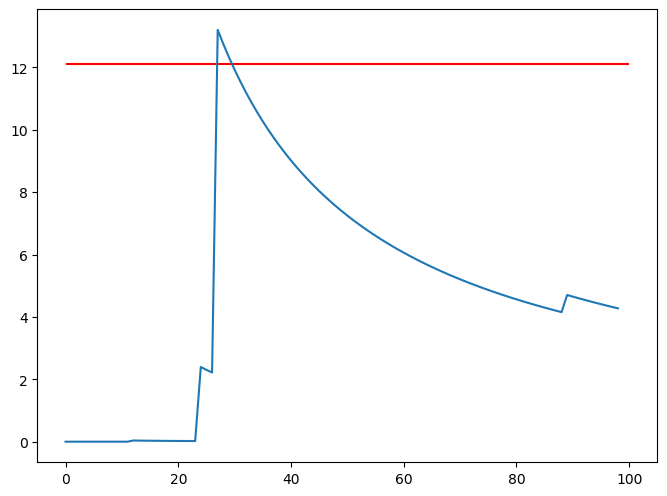

In [24]:
plt.plot(avg)
plt.hlines(int_val,0,N,label ="Quadratic evaluation",color="red")

## Metropolis - Hastings

In [25]:
def prior(x):
    return scipy.stats.norm(0,1).pdf(x)
def proposal(x,delta=1):
    low = np.min([(x-delta),(x+delta)])
    high = np.max([(x-delta),(x+delta)])
    #print(':::',low,high)
    return scipy.stats.uniform(low,high).rvs()
    
def posterior(x):
    return f_x(x)
def acceptance(p_curr, p_new):
    if p_new>p_curr:
        return True
    else:
        return (np.random.uniform(0,1) < (p_new/p_curr))
def mh(proposal,posterior,x0,n=1000,verbose=False):
    x_true= []
    x_false=[]
    x = x0
    while True:
        x_new = proposal(x)
        x_p = posterior(x)
        x_new_p = posterior(x_new)
        if(acceptance(x_p,x_new_p)):
            x = x_new
            x_true.append(x_new)
            if(len(x_true)%(n*0.1) == 0 and verbose):
                print('added:',len(x_true))
        else:
            x_false.append(x_new)
        if(len(x_true)>=n):
            return np.array(x_true), np.array(x_false)

In [26]:
jobs = []
'''lambda x,d=d: proposal(x,d)'''
def worker(d,res):
    N = 100
    accepted,rejected = mh(lambda x,d=d: proposal(x,d) ,posterior,scipy.stats.norm(0,1).rvs(),N)
    print(f'For $\sigma = {d}$, var = ', np.sqrt(np.var(accepted)/N))
    print(f'Rejection rate: {1. - accepted.size/rejected.size}')
    #print('ESS:',pm.effective_n(accepted))
    res[d] = {'val':accepted,'rej':(1. - accepted.size/rejected.size),'var':np.sqrt(np.var(accepted)/N)}
    
manager = multiprocessing.Manager()
return_dict = manager.dict()
jobs = []
for i in scipy.stats.uniform(0,10).rvs(10):
    p = multiprocessing.Process(target=worker, args=(i,return_dict))
    jobs.append(p)
    p.start()

for proc in jobs:
    proc.join()


For $\sigma = 0.9348190016209734$, var =  0.07102595004551233
Rejection rate: 0.5283018867924528
For $\sigma = 0.7393347561386743$, var =  0.06532908080094427
Rejection rate: 0.6323529411764706
For $\sigma = 2.3938445100970895$, var =  0.07391674712126842
Rejection rate: 0.7109826589595376
For $\sigma = 0.3607944838639343$, var =  0.08719698335858521
Rejection rate: 0.8185117967332123
For $\sigma = 6.339274190034436$, var =  0.06607277259104635
Rejection rate: 0.8542274052478134
For $\sigma = 6.115916082003316$, var =  0.07794492754723466
Rejection rate: 0.8605299860529986
For $\sigma = 6.9126563204446665$, var =  0.07116595959745349
Rejection rate: 0.8577524893314367
For $\sigma = 7.631981325366181$, var =  0.06453978446025321
Rejection rate: 0.875
For $\sigma = 7.301093321391466$, var =  0.07098806291652324
Rejection rate: 0.8765432098765432
For $\sigma = 9.088569644549318$, var =  0.06508656723051454
Rejection rate: 0.9085086916742909


In [27]:
print (return_dict.keys())

[0.9348190016209734, 0.7393347561386743, 2.3938445100970895, 0.3607944838639343, 6.339274190034436, 6.115916082003316, 6.9126563204446665, 7.631981325366181, 7.301093321391466, 9.088569644549318]


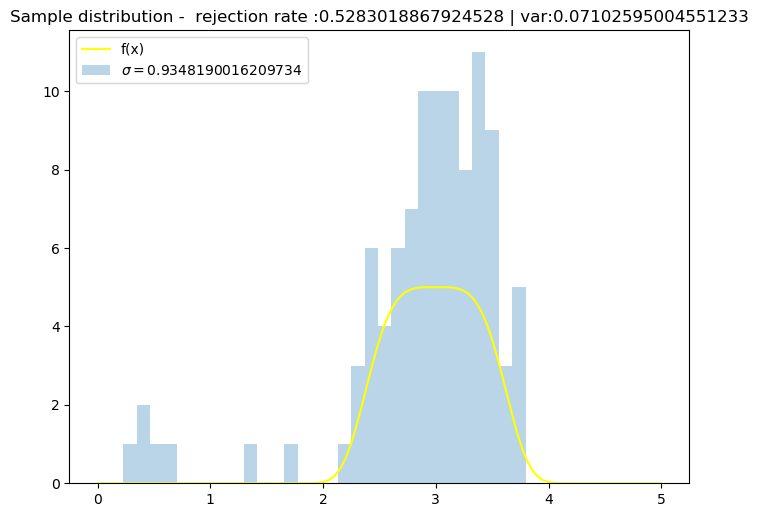

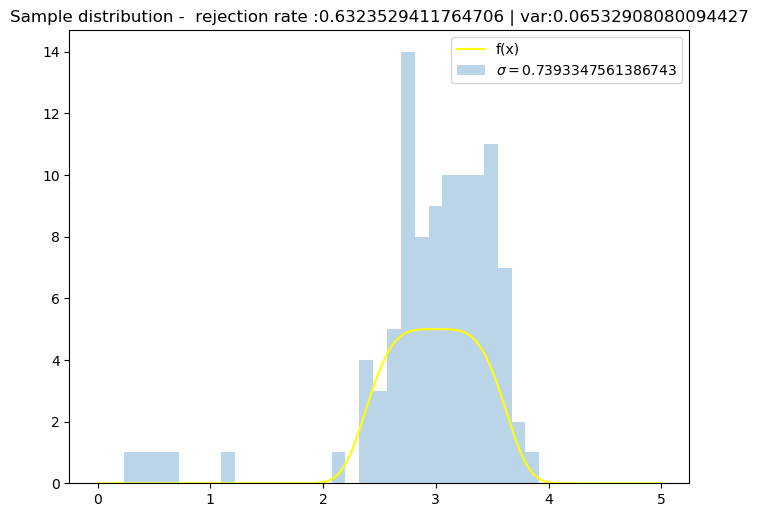

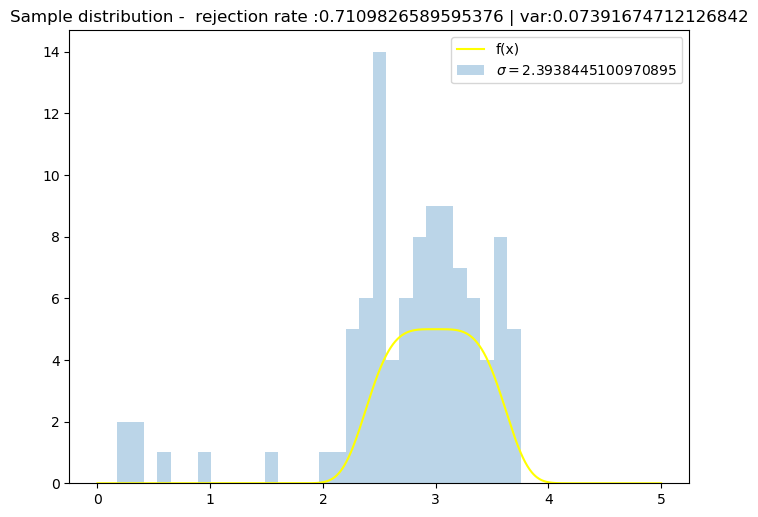

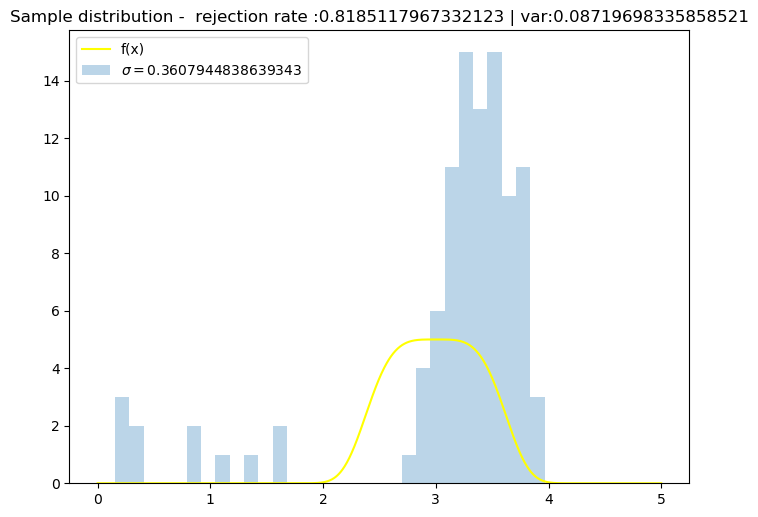

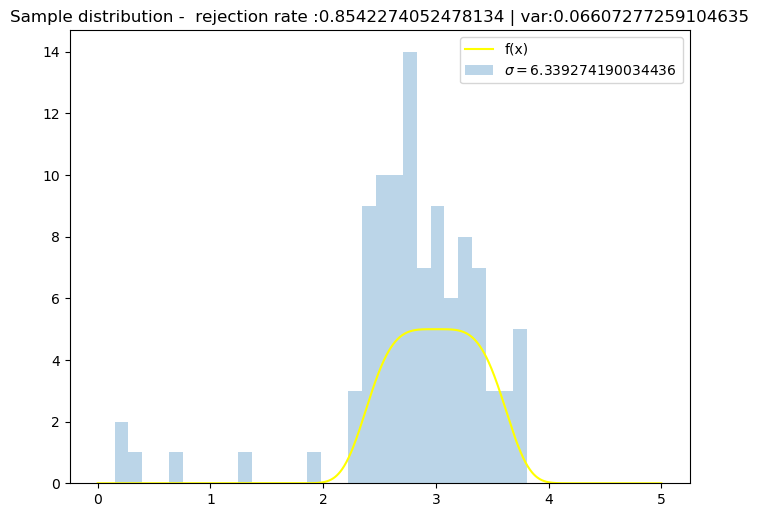

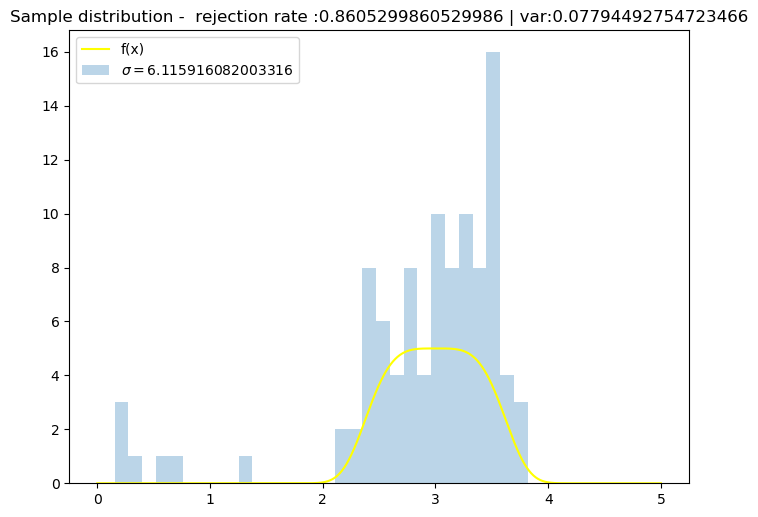

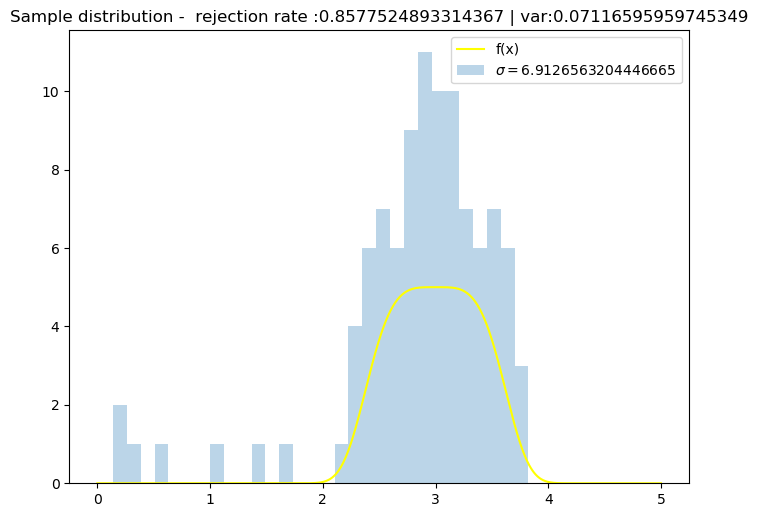

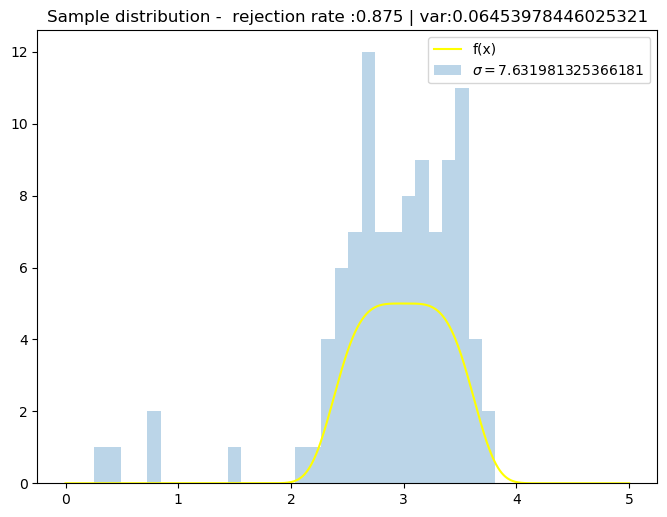

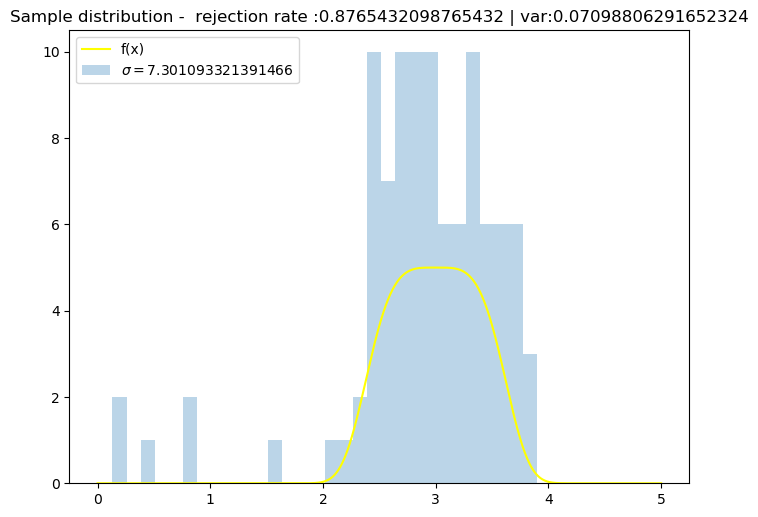

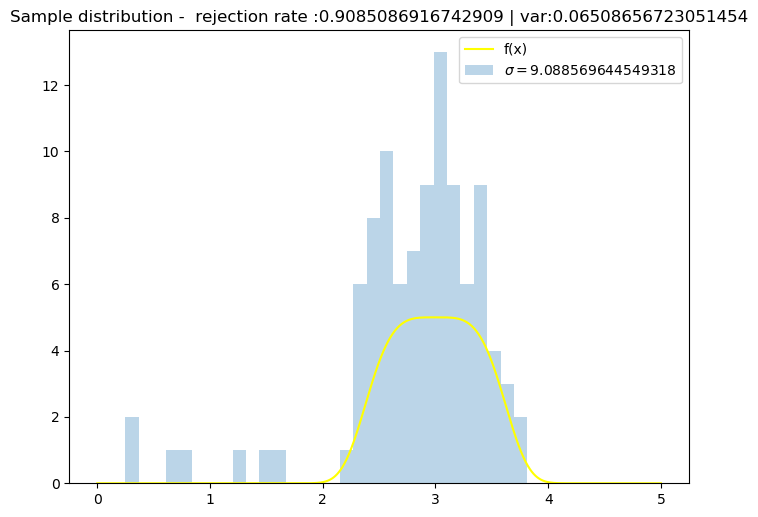

In [28]:
X = np.linspace(0,5,1000)
#fig, axs = plt.subplots(2, 2)
for k in return_dict.keys():
    plt.hist(return_dict[k]['val'],bins=30,alpha=0.3,label=(r'$\sigma=$' + str(k)))
    plt.plot(X,0.5*f_x(X),label='f(x)',color='yellow')
    rej  = return_dict[k]['rej']
    var = return_dict[k]['var']
    plt.title(f'Sample distribution -  rejection rate :{rej} | var:{var}')
    plt.legend()
    plt.show()

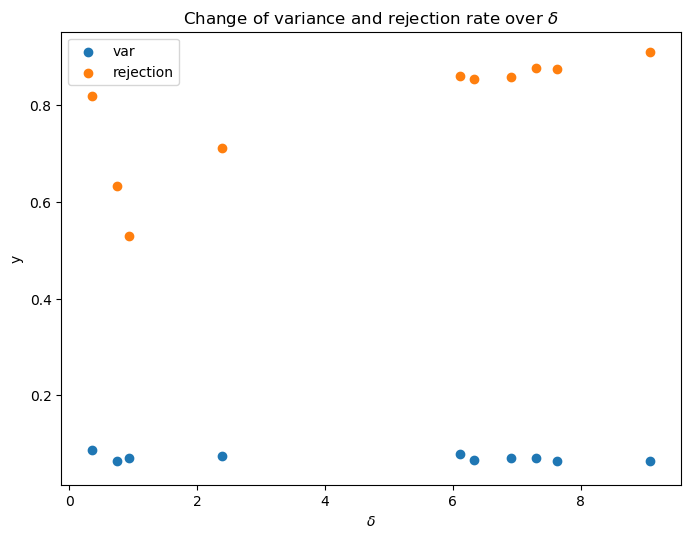

In [71]:
plt.scatter([k for k in return_dict.keys()],[return_dict[k]['var'] for k in return_dict.keys()],label='var')
plt.scatter([k for k in return_dict.keys()],[return_dict[k]['rej'] for k in return_dict.keys()],label='rejection')
plt.legend()
plt.title('Change of variance and rejection rate over $δ$')
plt.xlabel('$\delta$')
plt.ylabel('y')
plt.show()

Comment: We can see clearly in this plot that rejection rate is dependent with $\delta \: (\delta>0)$. As we are increasing $\delta$ we are expanding uniform sampling interval around neighbourhood of the current sample. With this we are generating samples uniformly, without certain rule, which is generating deviations in our proposals. With this we are increasing our number of rejections. This can be improved by new choice of proposal function which will propose new samples relatively close to current state. Typical choice would be normal distribution around current state.

# B

In [30]:
k1 = np.array([[0,4/5,0,1/5,0],[1/4,0,1/2,1/4,0],[0,1/2,0,1/10,2/5],[0,0,0,1,0],[1/3,0,1/3,1/3,0]])
k2 = np.array([[0.1,0.2,0.3,0.4],[0,0.5,0.2,0.3],[0,0,0.3,0.7],[0,0,0.1,0.9]])
k3 = np.array([[1,0,0,0],[0,0.5,0.5,0],[0,0.5,0.5,0],[0.5,0,0,0.5]])

## Note: 
Chain sketches and basic computation is in mc_appendix.pdf.

## $K_1$

In [31]:
np.linalg.matrix_power(k1,4)
# Showing that with multiple steps we are not getting to unique c. class 

array([[0.14333333, 0.        , 0.23333333, 0.62333333, 0.        ],
       [0.        , 0.28916667, 0.        , 0.59416667, 0.11666667],
       [0.15069444, 0.        , 0.25027778, 0.59902778, 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.25277778, 0.        , 0.64277778, 0.10444444]])

$K_1$ has 2 communicating classes. Thus this chain is irreducible, by def doesn't possess unique distribution. 

## $K_2$

$K_2$ has 3 communicating classes. Thus this chain is irreducible, by def doesn't possess unique distribution. 

In [32]:
print(np.linalg.matrix_power(k2,4))
print('Start:',k2)

[[1.000e-04 3.120e-02 1.372e-01 8.315e-01]
 [0.000e+00 6.250e-02 1.451e-01 7.924e-01]
 [0.000e+00 0.000e+00 1.264e-01 8.736e-01]
 [0.000e+00 0.000e+00 1.248e-01 8.752e-01]]
Start: [[0.1 0.2 0.3 0.4]
 [0.  0.5 0.2 0.3]
 [0.  0.  0.3 0.7]
 [0.  0.  0.1 0.9]]


## $K_3$

$K_3$ has 3 communicating classes. Thus this chain is irreducible, by def doesn't possess unique distribution. 

In [33]:
np.linalg.matrix_power(k3,4)

array([[1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.5   , 0.5   , 0.    ],
       [0.    , 0.5   , 0.5   , 0.    ],
       [0.9375, 0.    , 0.    , 0.0625]])

## $K_4$

$K_4$ has 1 communicating class. Thus this chain is reducible, and since our matrix is doubly stochastic (any row or column has sum 1), we can define our dist as $p(x)= \frac{1}{n}, \; \forall x$.  

In [34]:
# approx

k4 = np.array([[0,0.5,0,0.5],[0.5,0,0.5,0],[0,0.5,0,0.5],[0.5,0,0.5,0]])
print(k4)
print(np.linalg.matrix_power(k4,100))

[[0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]]
[[0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]]


## $K_5$

$K_5$ has 1 communicating class. This chain doesn't have distribution since we are dealing with infinite countable state space ( $S=\{ \mathbb{N} \}$).

In [35]:
# approx

k5 = np.array([[1/5,4/5,0,0,0],[1/5,0,4/5,0,0],[0,0.5,0,0.5,0],[0,0,4/5,0,1/5],[0,0,0,4/5,1/5]])
print(k5)
print(np.linalg.matrix_power(k5,10**6))
# doesn't have distribution, infinite countable state space.

[[0.2 0.8 0.  0.  0. ]
 [0.2 0.  0.8 0.  0. ]
 [0.  0.5 0.  0.5 0. ]
 [0.  0.  0.8 0.  0.2]
 [0.  0.  0.  0.8 0.2]]
[[0.06097561 0.24390244 0.3902439  0.24390244 0.06097561]
 [0.06097561 0.24390244 0.3902439  0.24390244 0.06097561]
 [0.06097561 0.24390244 0.3902439  0.24390244 0.06097561]
 [0.06097561 0.24390244 0.3902439  0.24390244 0.06097561]
 [0.06097561 0.24390244 0.3902439  0.24390244 0.06097561]]


# C

In [36]:
def banana_f(x):
    return np.exp(-(x[0]**2)/200- 0.5 * (x[1]+ 0.05 * x[0]**2 - 100*0.05)**2)

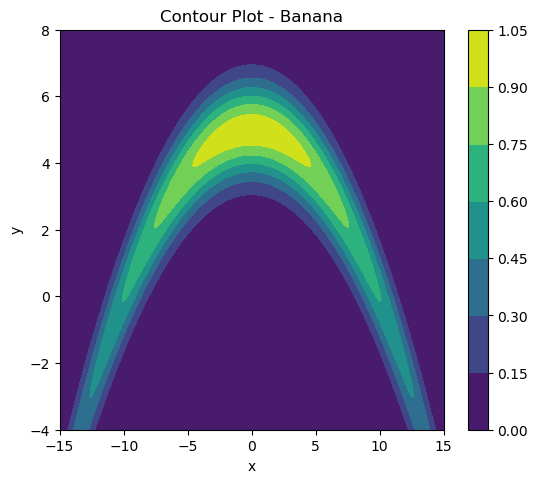

In [37]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
n_values = 1000
x_vals = np.linspace(-15, 15, n_values)
y_vals = np.linspace(-4, 8, n_values)
X, Y = np.meshgrid(x_vals, y_vals)
Z = banana_f(np.array([X,Y]))
cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)

ax.set_title('Contour Plot - Banana')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [38]:
def proposal_square1(x):
    low_x = np.min([x[0] - 0.5, x[0] + 0.5])
    high_x = np.max([x[0] - 0.5, x[0] + 0.5])
    low_y = np.min([x[1] - 0.5, x[1] + 0.5])
    high_y = np.max([x[1] - 0.5, x[1] + 0.5])
    return np.array([
        np.random.uniform(low_x, high_x),
        np.random.uniform(low_y, high_y)
    ])
def proposal_square2(x):
    low_x = np.min([x[0] - 10, x[0] + 10])
    high_x = np.max([x[0] - 10, x[0] + 10])
    low_y = np.min([x[1] - 10, x[1] + 10])
    high_y = np.max([x[1] - 10, x[1] + 10])
    return np.array([
        np.random.uniform(low_x, high_x),
        np.random.uniform(low_y, high_y)
    ])

In [39]:
def sample_banana(proposal):
    M = 1000
    start = scipy.stats.multivariate_normal(mean=[0,0], cov=[[2,1],[1,2]]).rvs()
    accepted,rejected = mh(lambda x: proposal(x) ,banana_f,start,M)
    print(f'var(x) = ', np.sqrt(np.var(accepted[:,0])/M))
    print(f'var(y) = ', np.sqrt(np.var(accepted[:,1])/M))  
    print(f'Rejection rate: {1. - len(accepted)/len(rejected)}')
    return accepted

In [40]:
def banana_analysis(proposal,name=''):
    fig = plt.figure(figsize=(6,5))
    left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
    ax = fig.add_axes([left, bottom, width, height]) 
    n_values = 1000
    x_vals = np.linspace(-15, 15, n_values)
    y_vals = np.linspace(-4, 8, n_values)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = banana_f(np.array([X,Y]))
    cp = plt.contourf(X, Y, Z)
    plt.colorbar(cp)
    data = []
    for i in range(1,4):
        res = sample_banana(proposal)
        x ,y = zip(*sorted(zip(res[:100,0], res[:100,1])))
        plt.plot(x,y,alpha=0.4,label=f'{i} chain - 100 MH samples')
        data.append(res)
    ax.set_title(f'Contour Plot with proposal of {name}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.legend()
    plt.show()
    for i,r in enumerate(data):
        plt.plot(r[:,0],label=f'x')
        plt.plot(r[:,1],label=f'y')
        plt.legend()
        plt.title(f'Trace plot of (x,y) - {i+1} chain')
        plt.show()

var(x) =  0.10613024900354741
var(y) =  0.058844019306678284
Rejection rate: -5.097560975609756
var(x) =  0.07835083722377863
var(y) =  0.06265297757081828
Rejection rate: -7.0
var(x) =  0.12287460426446355
var(y) =  0.03993466050345124
Rejection rate: -7.2644628099173545


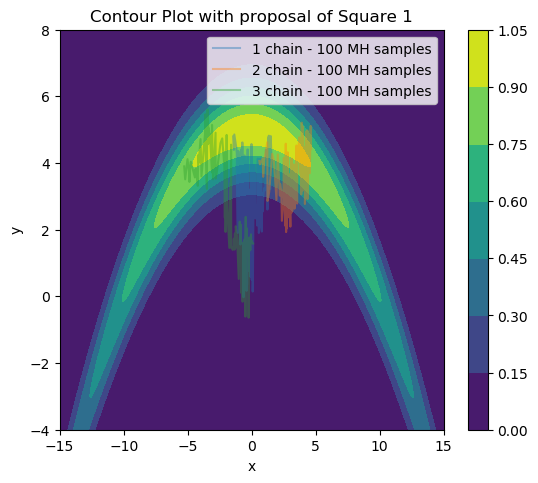

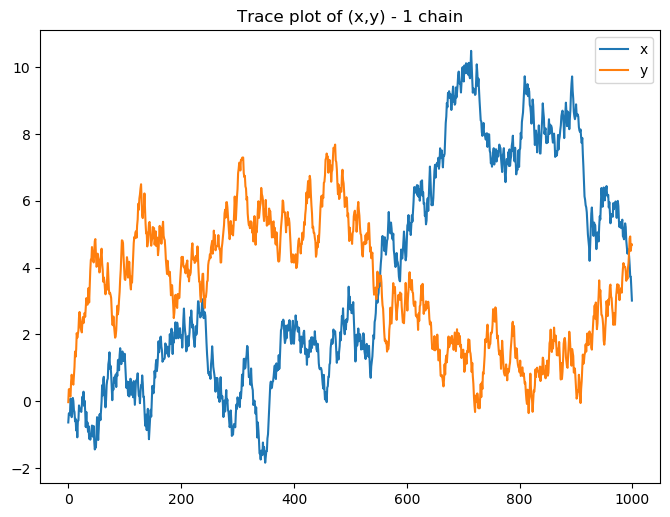

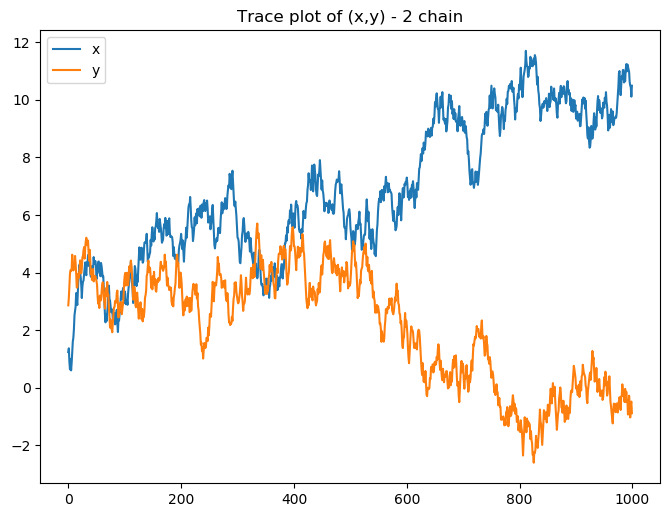

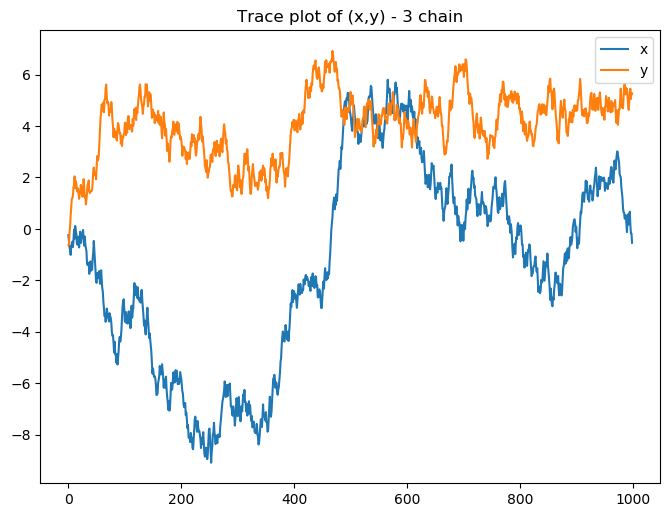

In [41]:
banana_analysis(proposal_square1,'Square 1')

var(x) =  0.2473938625100952
var(y) =  0.12360399076156807
Rejection rate: 0.8402555910543131
var(x) =  0.27696122812524127
var(y) =  0.1750274737914076
Rejection rate: 0.8404594767070837
var(x) =  0.23772858331155253
var(y) =  0.12751157524473083
Rejection rate: 0.8363070879030938


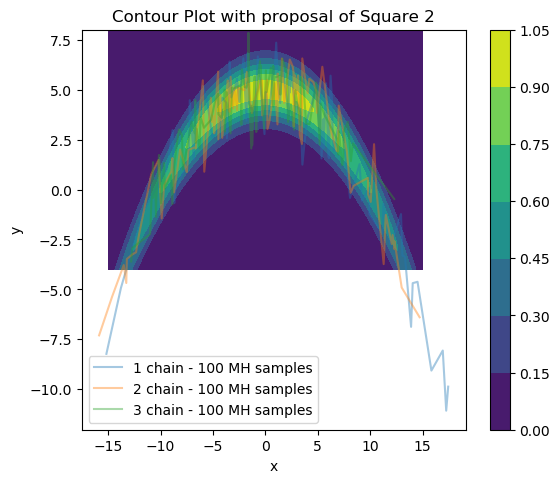

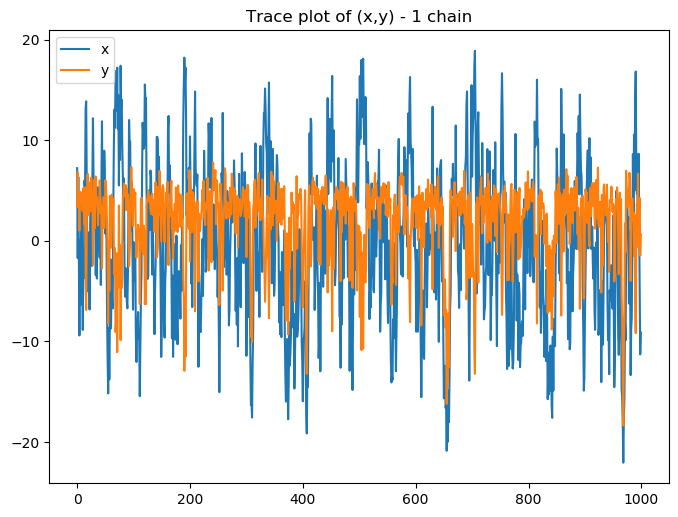

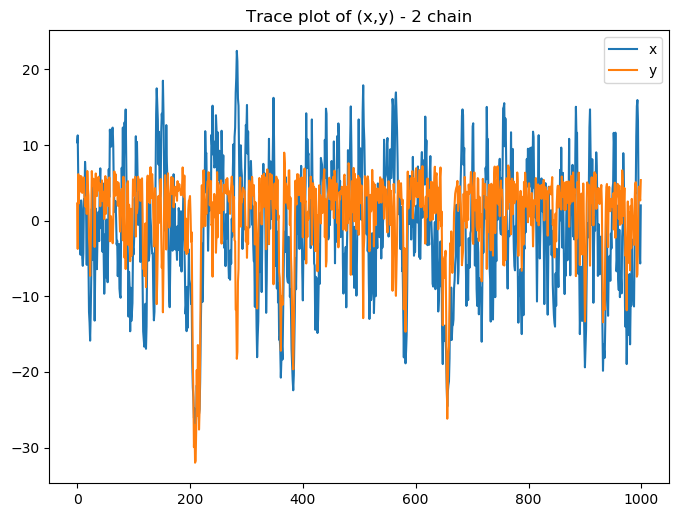

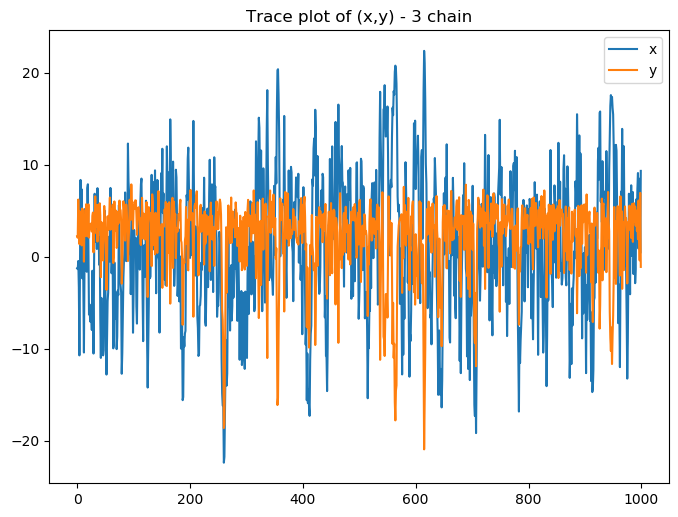

In [42]:
banana_analysis(proposal_square2,'Square 2')

var(x) =  0.25290221265999063
var(y) =  0.10780098432160315
Rejection rate: -0.6891891891891893
var(x) =  0.19113196242150066
var(y) =  0.17946326321015785
Rejection rate: -0.37174211248285327
var(x) =  0.2213058066793937
var(y) =  0.12309027490663461
Rejection rate: -0.5873015873015872


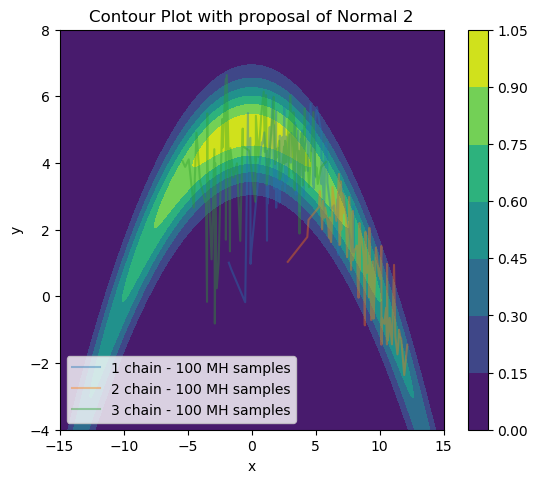

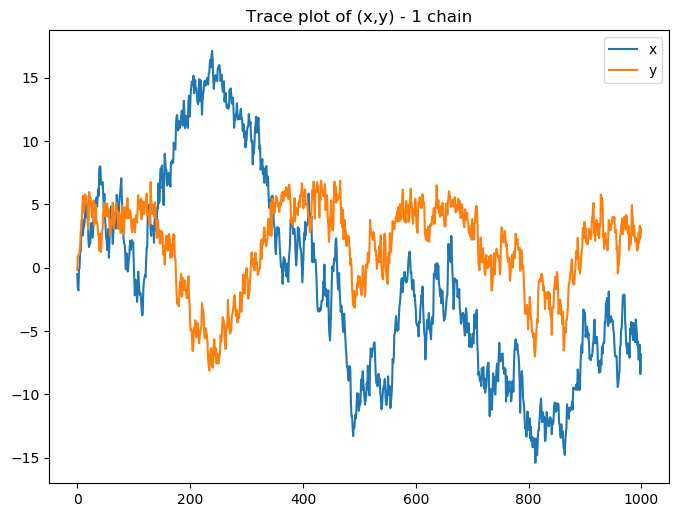

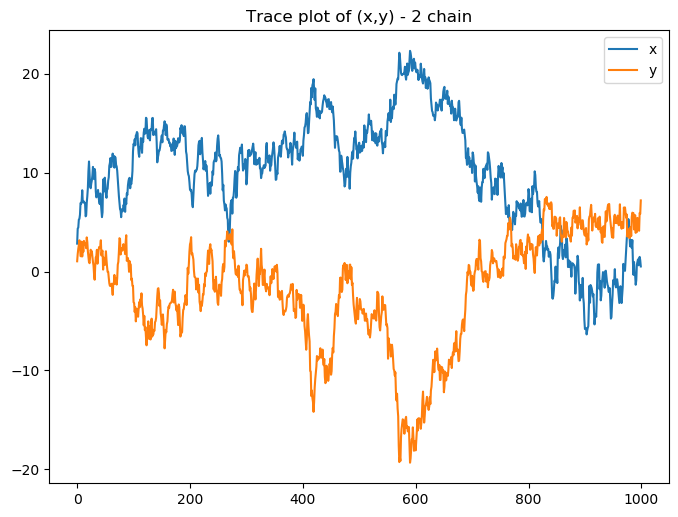

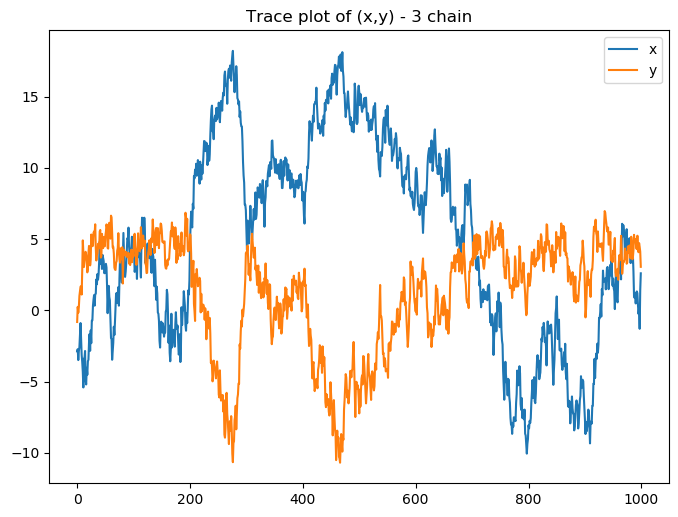

In [43]:
banana_analysis(lambda x: scipy.stats.multivariate_normal(mean=x, cov=[[1,0],[0,1]]).rvs(),'Normal 2')

## Comment:

In this example we can see how curvature of the function and proposal function play a big role in our sampling. Square1 sampling with smaller square, as expected demostrated smaller variance and more stable trace plot due to effectively smaller area of sampling. On the plots we can see that we are experiencing high autocorrelation within our samples. In these scenarios we can see typical tradeoffs between smaller sampling size vs. bigger sampling size. Smaller sampling size is bringing higher rejection ratio, where in our case this was 85% of generated samples were rejected, but variance was smaller. In the larger sampling area we had inverted scenario where rejections were pretty small (around 5-10%) while variance of our (x,y) was significantly higher. In the proposal distribution I opted for normal multivariate distribution, but it showed same results. I didn't had time to test different idea where sampling shape would be a ellipse which would shrink/stretch by the same proportion of the value of banana function. This would hopefully change our shape according to value of the function. In other words, eclipse would stretch in area where function is smooth( small gradient), while it would shrink in steep areas.